In [1]:
pip install ktrain

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.3 MB 75.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 
     |████████████████████████████████| 981 kB 48.5 MB/s 
     |████████████████████████████████| 263 kB 20.1 MB/s 
     |████████████████████████████████| 2.8 MB 58.4 MB/s 
     |████████████████████████████████| 1.2 MB 69.6 MB/s 
     |████████████████████████████████| 468 kB 66.8 MB/s 
     |████████████████████████████████| 596 kB 51.2 MB/s 
     |████████████████████████████████| 86 kB 6.5 MB/s 
     |████████████████████████████████| 3.3 MB 59.6 MB/s 
     |████████████████████████████████| 880 kB 59.9 MB/s 
  Created wheel for ktrain: filename=ktrain-0.31.2-py3-none-any.whl size=25313063 sha256=d0a2f96853a7d46d2a2d3412d304a4997ca13ea5c3eff2fe04ea5fc59b4f5149
  Stored in directory: /root/.cache/pip/wheels/0a/b3/dd/512a01ea0b4f31d96163518b58361bb72d3bcb916d291052e7
  C

In [2]:

%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID';
os.environ['CUDA_VISIBLE_DEVICES']='0';

In [3]:
import ktrain
from ktrain import text
from sklearn.datasets import fetch_20newsgroups

In [4]:
categories = ['alt.atheism','soc.religion.christian','comp.graphics','sci.med','rec.sport.baseball']

In [5]:
train = fetch_20newsgroups(
    subset = 'train',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [6]:
test = fetch_20newsgroups(
    subset = 'test',
    categories = categories,
    shuffle = True,
    random_state = 0
)

In [7]:
test.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [8]:
test.target_names

['alt.atheism',
 'comp.graphics',
 'rec.sport.baseball',
 'sci.med',
 'soc.religion.christian']

In [9]:
 X_train = train.data
 y_train = train.target

 X_test = test.data
 y_test = test.target

In [10]:
y_train

array([2, 1, 4, ..., 0, 2, 3])

In [11]:
X_train

['From: rcasteto@watsol.uwaterloo.ca (Ron Castelletto)\nSubject: Orioles Phillies Red Sox\nKeywords: orioles phillies red sox baltimore philadelphia boston bosox\nOrganization: University of Waterloo\nDistribution: na\nLines: 20\n\n\nCan someone send me ticket ordering information for the\nfollowing teams:  Baltimore, Philadelphia and Boston.\n\nAlso, if you have a home schedule available - can you tell me the dates\nfor all home games between July26-Aug6 and between Aug30-Sept10 and if\nany of these games are promotion nights or special discount nights?\n\nThanks !!!  Ron\n\nPS: and also who the opponents are for these games :-)\n\nDo NOT reply to this account,\nplease reply to:  ronc@vnet.ibm.com\n\n __        _                 IBM Canada Lab Database Technology\n|  \\      / \\                Associate Development Analyst\n|__/ on   |  astelletto      (416) 448-2546 Tie Line: 778-2546\n| \\_      \\_/                Internal Mail: 51/843/895/TOR\n\n',
 'From: nahess@mir.gatech.edu (

In [12]:
model_name = 'distilbert-base-uncased-distilled-squad'
trans = text.Transformer(model_name,maxlen=512,class_names=categories)

Downloading:   0%|          | 0.00/451 [00:00<?, ?B/s]

In [13]:
train_data = trans.preprocess_train(X_train,y_train)
test_data = trans.preprocess_test(X_test,y_test)

preprocessing train...
language: en
train sequence lengths:
	mean : 291
	95percentile : 820
	99percentile : 1757


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 323
	95percentile : 894
	99percentile : 2394


In [14]:
model = trans.get_classifier()

Downloading:   0%|          | 0.00/266M [00:00<?, ?B/s]

In [15]:
learner = ktrain.get_learner(model,train_data= train_data,val_data=test_data,batch_size=16)

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
178/178 [==============================] - 175s 924ms/step - loss: 1.6108 - accuracy: 0.1843
Epoch 2/10
178/178 [==============================] - 168s 945ms/step - loss: 1.5700 - accuracy: 0.3206
Epoch 3/10
178/178 [==============================] - 168s 941ms/step - loss: 0.6728 - accuracy: 0.8474
Epoch 4/10
178/178 [==============================] - 167s 940ms/step - loss: 0.2426 - accuracy: 0.9285
Epoch 5/10
178/178 [==============================] - 167s 940ms/step - loss: 0.7627 - accuracy: 0.6765
Epoch 6/10
178/178 [==============================] - 25s 138ms/step - loss: 1.5355 - accuracy: 0.2370


done.
Visually inspect loss plot and select learning rate associated with falling loss


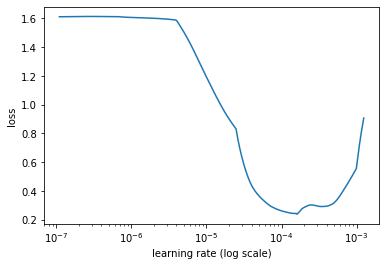

In [16]:
learner.lr_find(show_plot=True,max_epochs=10)

In [17]:
learner.fit_onecycle(1e-4,1)



begin training using onecycle policy with max lr of 0.0001...
179/179 [==============================] - 217s 1s/step - loss: 0.6457 - accuracy: 0.7596 - val_loss: 0.2854 - val_accuracy: 0.9084


In [18]:
learner.validate(class_names=categories)

                        precision    recall  f1-score   support

           alt.atheism       0.84      0.71      0.77       319
soc.religion.christian       0.95      0.97      0.96       389
         comp.graphics       1.00      0.97      0.98       397
               sci.med       0.95      0.92      0.93       396
    rec.sport.baseball       0.80      0.94      0.87       398

              accuracy                           0.91      1899
             macro avg       0.91      0.90      0.90      1899
          weighted avg       0.91      0.91      0.91      1899



array([[226,   3,   0,  12,  78],
       [  4, 376,   1,   6,   2],
       [  3,   4, 386,   3,   1],
       [ 12,  10,   0, 364,  10],
       [ 23,   2,   0,   0, 373]])

In [19]:
predictor = ktrain.get_predictor(learner.model, preproc = trans)

In [20]:
x= 'I have a 42 yr old male friend, misdiagnosed as having osteopporosis for two years, who recently found out that his illness is the rare Gauchers disease. '

In [21]:
predictor.predict(x)

'sci.med'